# Imports

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [3]:
df = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [4]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df.tail(5)

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [7]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# Visualise Dataset

In [8]:
positiveReviews = df[df['feedback']==1]

In [9]:
positiveReviews

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [10]:
negativeReviews = df[df['feedback']==0]

In [11]:
negativeReviews

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


<Axes: ylabel='count'>

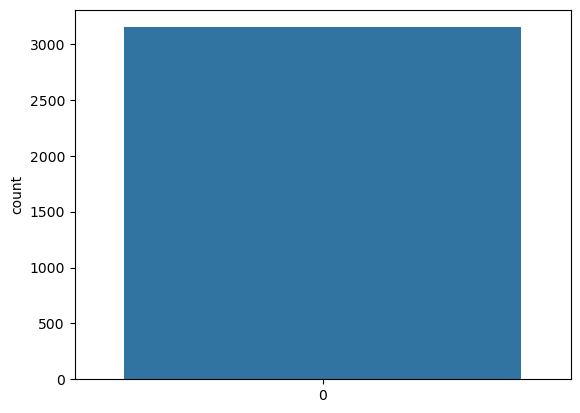

In [12]:
sns.countplot(df['feedback'], label = 'Count')

<Axes: xlabel='rating', ylabel='count'>

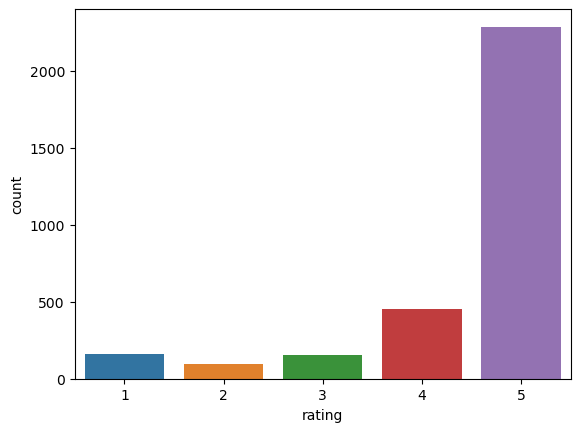

In [13]:
sns.countplot(x = 'rating', data = df)

<Axes: >

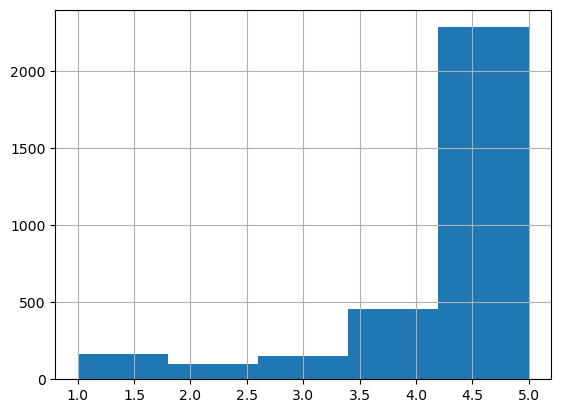

In [14]:
df['rating'].hist(bins = 5)

<Axes: xlabel='variation', ylabel='rating'>

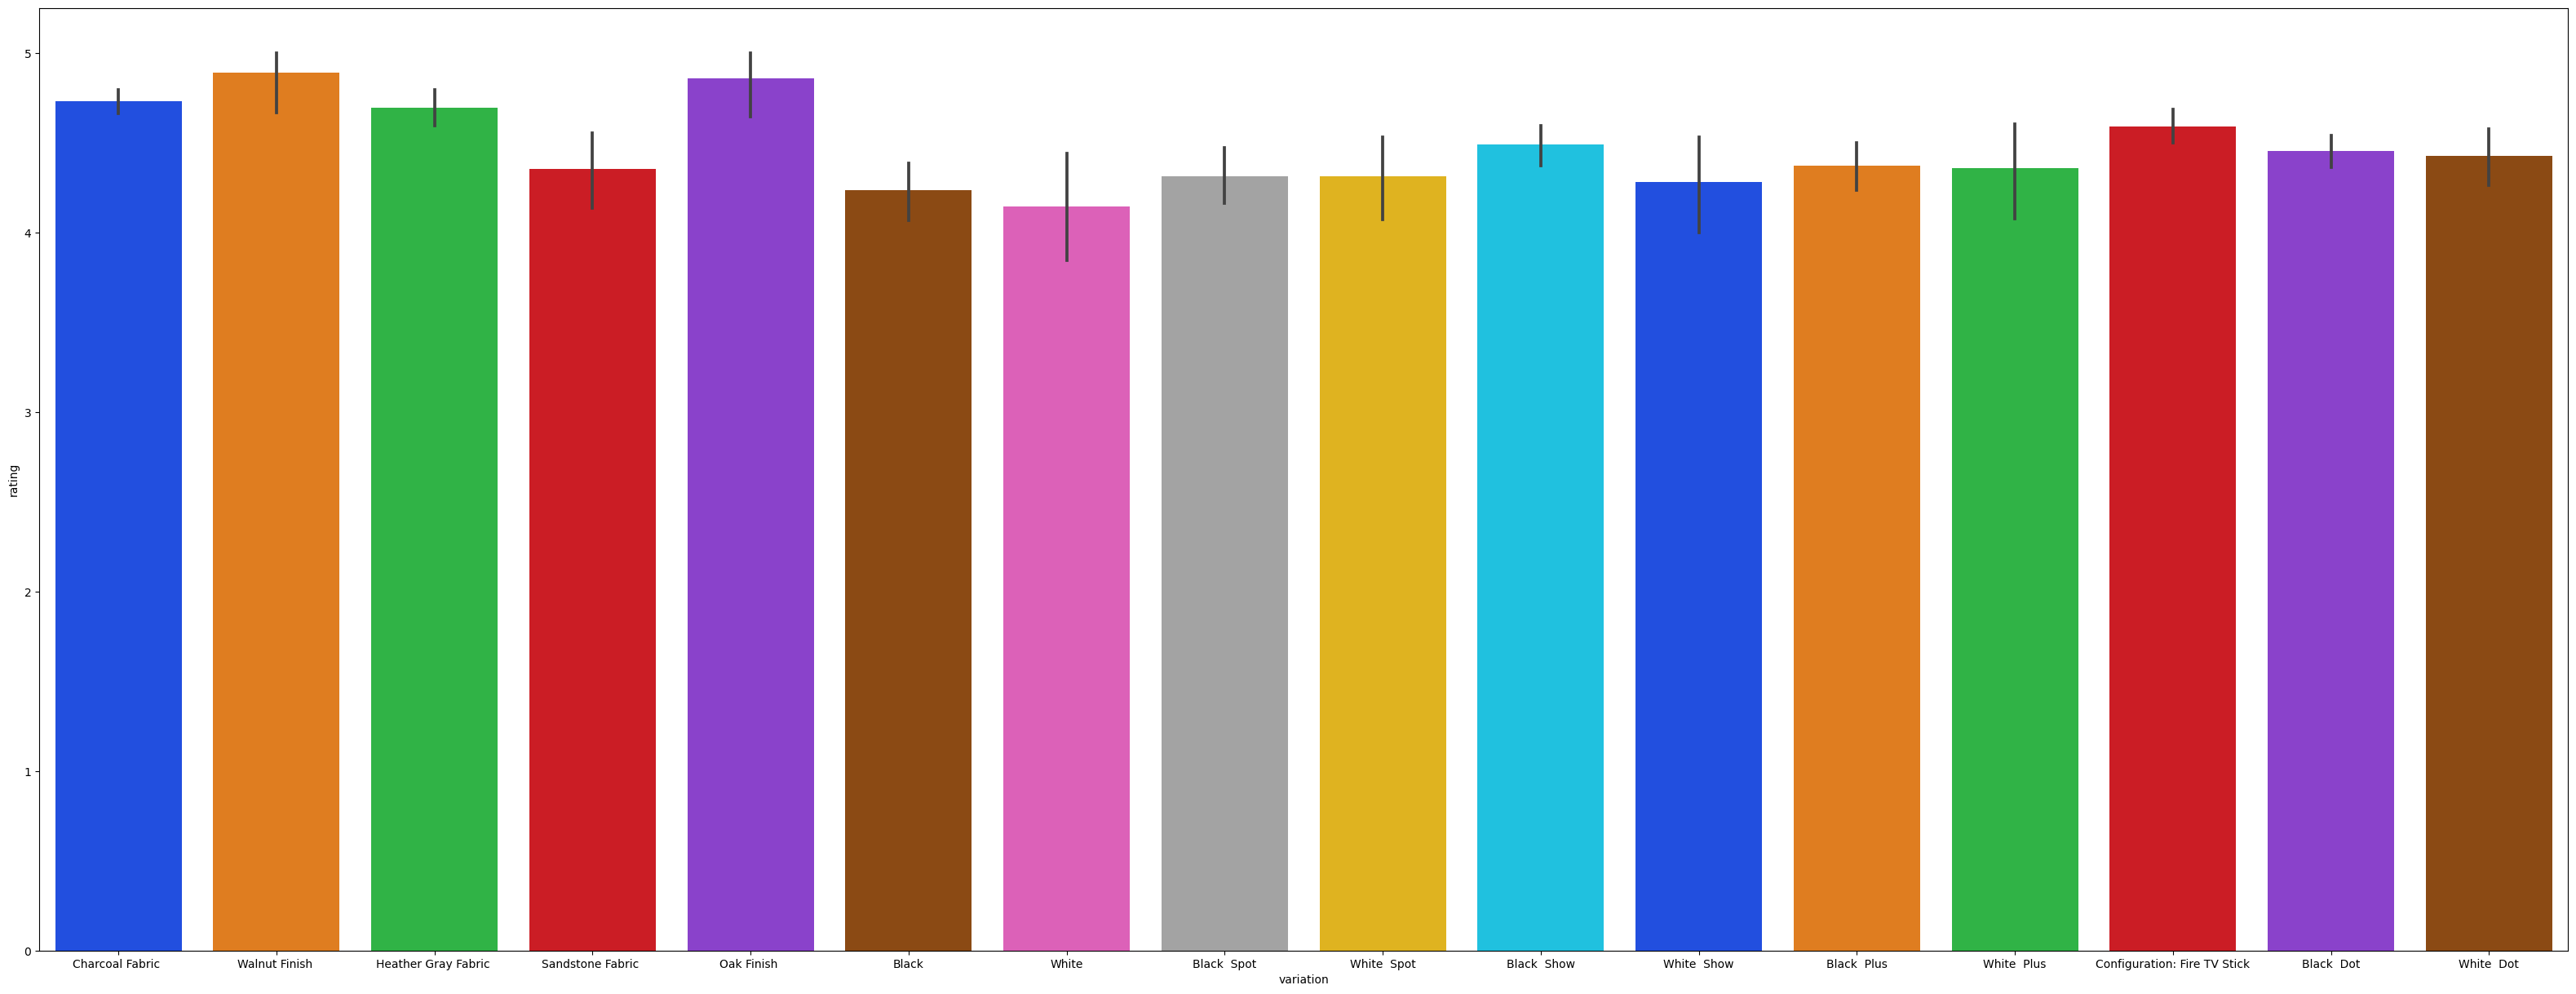

In [15]:
plt.figure(figsize= (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = df, palette = 'bright')

# Cleaning Up Data

In [16]:
df = df.drop(['date', 'rating'], axis = 1)

In [17]:
df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [18]:
variationDummies = pd.get_dummies(df['variation'], drop_first = True) # One-Hot Encoding

In [19]:
variationDummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
df.drop(['variation'], axis = 1, inplace = True)

In [21]:
df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [22]:
df = pd.concat([df, variationDummies], axis = 1)

In [23]:
df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorizer = CountVectorizer()
alexaCountVect = vectorizer.fit_transform(df['verified_reviews'])

In [26]:
alexaCountVect

<3150x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60852 stored elements in Compressed Sparse Row format>

In [27]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [28]:
print(alexaCountVect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
df.drop(['verified_reviews'], axis = 1, inplace = True) # inplace = True so it also changes it immediately in memory

In [30]:
reviews = pd.DataFrame(alexaCountVect.toarray())

In [31]:
df = pd.concat([df, reviews], axis = 1)

In [32]:
df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
x = df.drop(['feedback'], axis = 1) # X Train

In [34]:
x

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = df['feedback'] # Y Model

In [36]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

# Model Training

In [42]:
x.shape

(3150, 4059)

In [43]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2) # 20% for testing, 80% for training

In [44]:
xTrain.shape # The amount of samples available for training

(2520, 4059)

In [45]:
xTest.shape # The amount of samples available for testing

(630, 4059)

In [47]:
annClassifier = tf.keras.models.Sequential()
annClassifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (4059,)))
annClassifier.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
annClassifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [48]:
annClassifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 400)               1624000   
                                                                 
 dense_3 (Dense)             (None, 400)               160400    
                                                                 
 dense_4 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [49]:
annClassifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
epochsHist = annClassifier.fit(xTrain, yTrain, epochs = 20)

Epoch 1/20
79/79 [==============================] - 1s 6ms/step - loss: 0.2770 - accuracy: 0.9139
Epoch 2/20
79/79 [==============================] - 0s 5ms/step - loss: 0.0933 - accuracy: 0.9643
Epoch 3/20
79/79 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.9877
Epoch 4/20
79/79 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 0.9921
Epoch 5/20
79/79 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.9937
Epoch 6/20
79/79 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.9933
Epoch 7/20
79/79 [==============================] - 0s 6ms/step - loss: 0.0160 - accuracy: 0.9929
Epoch 8/20
79/79 [==============================] - 0s 6ms/step - loss: 0.0157 - accuracy: 0.9940
Epoch 9/20
79/79 [==============================] - 0s 6ms/step - loss: 0.0144 - accuracy: 0.9933
Epoch 10/20
79/79 [==============================] - 0s 6ms/step - loss: 0.0147 - accuracy: 0.9933
Epoch 11/20
79/79 [

# Evaluating Model Performance

In [51]:
yTrainPred = annClassifier.predict(xTrain)
yTrainPred

79/79 [==============================] - 0s 2ms/step


array([[9.999996e-01],
       [1.000000e+00],
       [4.850033e-04],
       ...,
       [1.000000e+00],
       [9.998275e-01],
       [1.000000e+00]], dtype=float32)

In [52]:
yTrainPred = (yTrainPred > 0.5)

In [53]:
yTrainPred

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

<Axes: >

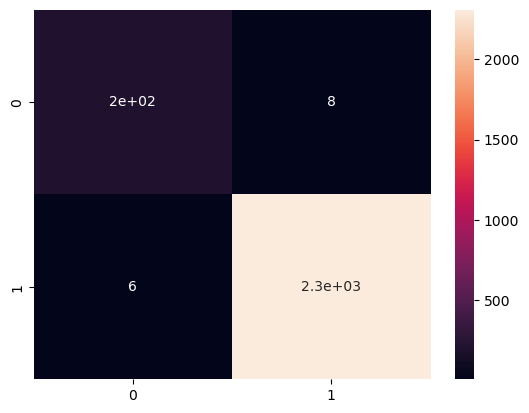

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yTrain, yTrainPred)
sns.heatmap(cm, annot = True)

20/20 [==============================] - 0s 2ms/step


<Axes: >

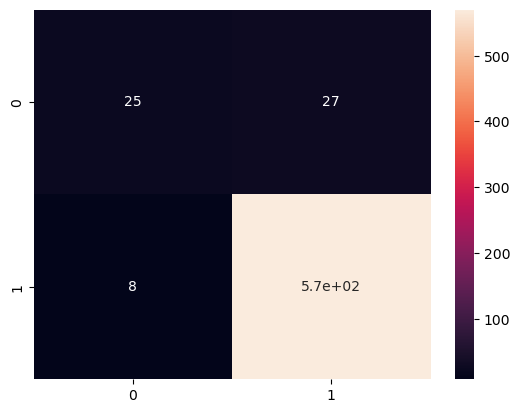

In [56]:
yPredTest = annClassifier.predict(xTest)
yPredTest

yPredTest = (yPredTest > 0.5)

cm = confusion_matrix(yTest, yPredTest)
sns.heatmap(cm, annot = True)

Text(0, 0.5, 'Training Loss')

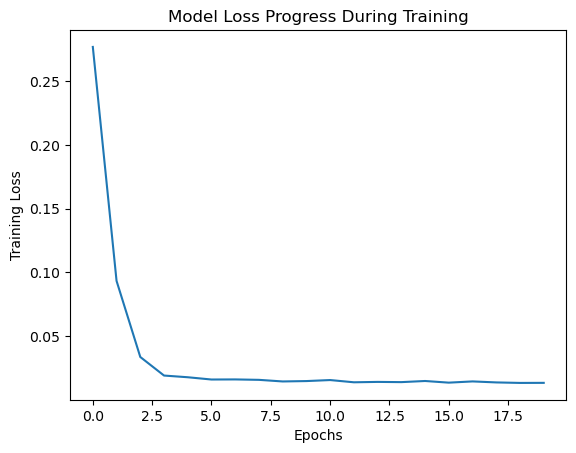

In [57]:
plt.plot(epochsHist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Training Accuracy')

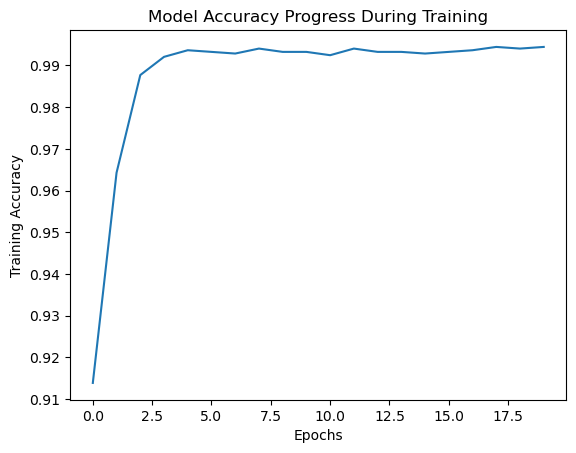

In [58]:
plt.plot(epochsHist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [62]:
# Calculates the ROC curve and AUC score for the training set
yTrainPredProb = annClassifier.predict(xTrain)
fpr_train, tpr_train, thresholds_train = roc_curve(yTrain, yTrainPredProb)
roc_auc_train = roc_auc_score(yTrain, yTrainPredProb)

79/79 [==============================] - 0s 2ms/step


In [63]:
# Calculates the ROC curve and AUC score for the test set
yTestPredProb = annClassifier.predict(xTest)
fpr_test, tpr_test, thresholds_test = roc_curve(yTest, yTestPredProb)
roc_auc_test = roc_auc_score(yTest, yTestPredProb)

20/20 [==============================] - 0s 2ms/step


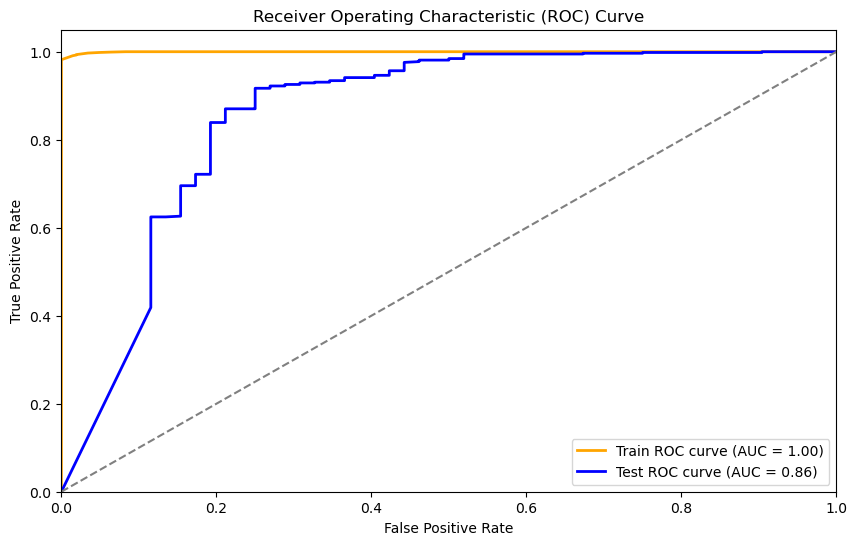

In [69]:
# Plots the ROC curve for both training and test sets
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='orange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()